# Titanic - Machine Learning from Disaster

Aqui está a lendária competição Titanic ML - o melhor e primeiro desafio para você se envolver em competições de ML e se familiarizar com o funcionamento da plataforma Kaggle.

link: https://www.kaggle.com/competitions/titanic?rvi=1

## Dicionário de Variáveis:

### Variáveis e Definições

- **Sobrevivência:** Indica se o passageiro sobreviveu ou não. (0 = Não, 1 = Sim)
- **Classe:** Classe do bilhete do passageiro. (1 = 1ª classe, 2 = 2ª classe, 3 = 3ª classe)
- **Sexo:** Gênero do passageiro.
- **Idade:** Idade do passageiro em anos.
- **SibSp:** Número de irmãos/cônjuges a bordo do Titanic.
- **Parch:** Número de pais/filhos a bordo do Titanic.
- **Bilhete:** Número do bilhete do passageiro.
- **Tarifa:** Tarifa paga pelo passageiro.
- **Cabine:** Número da cabine do passageiro.
- **Embarque:** Porto de embarque do passageiro. (C = Cherbourg, Q = Queenstown, S = Southampton)


## Bibliotecas Utilizadas:

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import confusion_matrix

## Importando os dados:

In [72]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Informações sobre as bases de dados:

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [75]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


No conjunto de dados, a variável "Age" representa a idade dos passageiros. Algumas entradas dessa coluna estão vazias, o que pode prejudicar a eficácia dos nossos modelos de machine learning. Para lidar com isso, optamos por substituir os valores vazios pela média das idades dos passageiros. Escolhemos esse método em vez de simplesmente atribuir zero, pois todos os passageiros têm uma idade, e atribuir zero não seria uma representação precisa da realidade.

Média de idade:

In [76]:
mean_age_train = train.Age.mean()
mean_age_train

29.69911764705882

In [77]:
mean_age_test = test.Age.mean()
mean_age_test

30.272590361445783

Substituir os valores vazios (NaN) pela média das idades:

In [78]:
# Substituir valores NaN pela média das idades
train['Age'].fillna(mean_age_train, inplace=True)

test['Age'].fillna(mean_age_test, inplace=True)

# Verificar se não há mais valores NaN na coluna 'Age'
print(train['Age'].isnull().sum())
print(test['Age'].isnull().sum())

0
0


Na base de teste, temos um valor vazio na coluna "Fare". Vamos substituido pela média de "Fare:

In [79]:
mean_fare_test = test.Fare.mean()

test['Fare'].fillna(mean_fare_test, inplace=True)

Ferificando novamente os dfs:

In [80]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

As coluna de interesse para nossa analise estão devidamente tratadas

Selecionando as colunas númericas dos df:

In [81]:
colunas_numericas_train = train.select_dtypes(include=['int', 'float'])
colunas_numericas_test = test.select_dtypes(include=['int', 'float'])
print(colunas_numericas_train.columns)
print(colunas_numericas_test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


## Correlação entre as variaveis númericas:

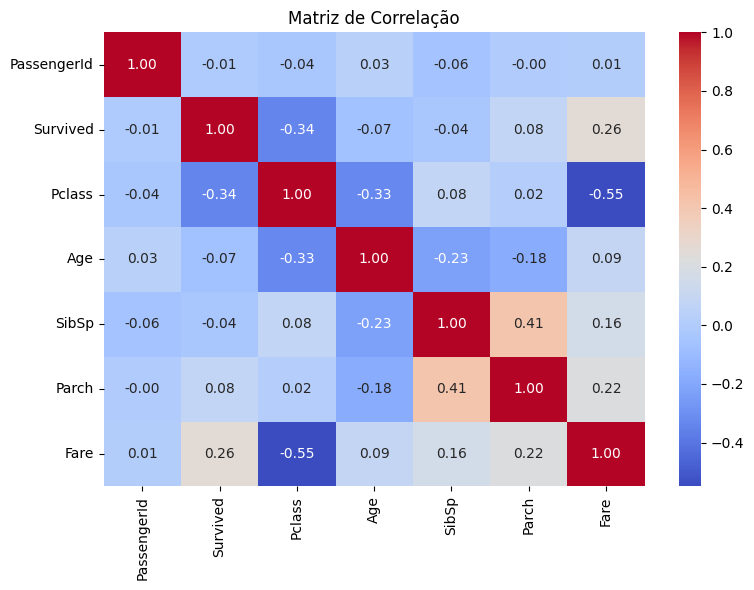

In [82]:
# Calculando a matriz de correlação
correlation_matrix = colunas_numericas_train.corr()

# Criando o mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.tight_layout()

# Exibindo o gráfico
plt.show()


Não há uma correlação forte entre as outras variaveis e "Survived", portanto modelos de regressão linear podem não ser o mais indicados aqui. Isso já era esperado pois estamos tratando de um caso de classificação binária: quando você tem duas classes distintas e deseja prever em qual classe uma observação pertence. No nosso caso aqui espefifico "Survived" recebe 1 para quem sobreviveu e 0 para que não sobrevieu.

## Modelos de Clássficação:

Separar a variavel que queremos prever do restante das variaveis (apenas variáveis numéricas):

In [83]:
Y = train.Survived

X = colunas_numericas_train.drop('Survived', axis=1)

Dividir os dados em conjuntos de treinamento e teste e exibir o número de amostras em cada conjunto:


In [84]:
# Dividindo os dados em conjuntos de treinamento e teste (80% para treinamento, 20% para teste)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Exibindo o número de amostras nos conjuntos de treinamento e teste
print("Número de amostras no conjunto de treinamento:", X_train.shape[0])
print("Número de amostras no conjunto de teste:", X_val.shape[0])


Número de amostras no conjunto de treinamento: 712
Número de amostras no conjunto de teste: 179


Veja que mudei o nome convencional de X_test e Y_test para X_val e Y_Val. Estou fazendo isso pois irei usar apenas o df = train nesse momento. Depois que o modelo estiver bem estabelecido gente faz a previsão usando o df = test.

## Arvoré de Classficificação:

In [85]:
# Criando uma instância do modelo de árvore de decisão para classificação
tree_classifier = DecisionTreeClassifier(random_state=42)

# Treinando o modelo com os dados de treinamento
tree_classifier.fit(X_train, Y_train)

# Fazendo previsões nos dados de teste
Y_pred_tree = tree_classifier.predict(X_val)

# Avaliando o desempenho do modelo usando a acurácia
accuracy = accuracy_score(Y_val, Y_pred_tree)
print("Acurácia do modelo de árvore de decisão:", accuracy)


Acurácia do modelo de árvore de decisão: 0.6368715083798883


## Modelo KNeighborsClassfifier:

In [86]:
# Criando uma instância do modelo KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Treinando o modelo com os dados de treinamento
knn_classifier.fit(X_train, Y_train)

# Fazendo previsões nos dados de teste
Y_pred_KN = knn_classifier.predict(X_val)

# Avaliando o desempenho do modelo usando a acurácia
accuracy_KN = accuracy_score(Y_val, Y_pred_KN)
print("Acurácia do modelo KNeighborsClassifier:", accuracy_KN)


Acurácia do modelo KNeighborsClassifier: 0.659217877094972


## Modelo Regressão Logística:

In [87]:
# Criando uma instância do modelo de Regressão Logística
logistic_regression = LogisticRegression()

# Treinando o modelo com os dados de treinamento
logistic_regression.fit(X_train, Y_train)

# Fazendo previsões nos dados de teste
Y_pred_LR = logistic_regression.predict(X_val)

# Avaliando o desempenho do modelo usando a acurácia
accuracy_LR = accuracy_score(Y_val, Y_pred_LR)
print("Acurácia do modelo de Regressão Logística:", accuracy_LR)


Acurácia do modelo de Regressão Logística: 0.7318435754189944


## Modelo Random Forest:

In [88]:
# Criando uma instância do modelo Random Forest
random_forest = RandomForestClassifier(random_state=42)

# Treinando o modelo com os dados de treinamento
random_forest.fit(X_train, Y_train)

# Fazendo previsões nos dados de teste
Y_pred_RF = random_forest.predict(X_val)

# Avaliando o desempenho do modelo usando a acurácia
accuracy_RF = accuracy_score(Y_val, Y_pred_RF)
print("Acurácia do modelo Random Forest:", accuracy_RF)


Acurácia do modelo Random Forest: 0.7206703910614525


## Modelo Support Vector Machines (SVM):

In [89]:
# Criando uma instância do modelo SVM
svm_classifier = SVC()

# Treinando o modelo com os dados de treinamento
svm_classifier.fit(X_train, Y_train)

# Fazendo previsões nos dados de teste
Y_pred_SVM = svm_classifier.predict(X_val)

# Avaliando o desempenho do modelo usando a acurácia
accuracy_SVM = accuracy_score(Y_val, Y_pred_SVM)
print("Acurácia do modelo SVM:", accuracy_SVM)


Acurácia do modelo SVM: 0.5977653631284916


## Modelo Gradient Boosting Machines (GBM):

In [90]:
# Criando uma instância do modelo XGBoost
xgb_classifier = xgb.XGBClassifier()

# Treinando o modelo com os dados de treinamento
xgb_classifier.fit(X_train, Y_train)

# Fazendo previsões nos dados de teste
Y_pred_XGB = xgb_classifier.predict(X_val)

# Avaliando o desempenho do modelo usando a acurácia
accuracy_XGB = accuracy_score(Y_val, Y_pred_XGB)
print("Acurácia do modelo XGBoost:", accuracy_XGB)


Acurácia do modelo XGBoost: 0.6927374301675978


## Matriz de confusão de cada modelos:

In [91]:
# Calcular e imprimir a matriz de confusão para cada modelo

# Árvore de Classificação
conf_matrix_tree = confusion_matrix(Y_val, Y_pred)
print("Matriz de Confusão para Árvore de Classificação:")
print(conf_matrix_tree)

# KNeighborsClassifier
conf_matrix_KN = confusion_matrix(Y_val, Y_pred_KN)
print("Matriz de Confusão para KNeighborsClassifier:")
print(conf_matrix_KN)
print()

# Regressão Logística
conf_matrix_LR = confusion_matrix(Y_val, Y_pred_LR)
print("Matriz de Confusão para Regressão Logística:")
print(conf_matrix_LR)

# Random Forest
conf_matrix_RF = confusion_matrix(Y_val, Y_pred_RF)
print("Matriz de Confusão para Random Forest:")
print(conf_matrix_RF)
print()

# SVM
conf_matrix_SVM = confusion_matrix(Y_val, Y_pred_SVM)
print("Matriz de Confusão para SVM:")
print(conf_matrix_SVM)
print()

# XGBoost
conf_matrix_XGB = confusion_matrix(Y_val, Y_pred_XGB)
print("Matriz de Confusão para XGBoost:")
print(conf_matrix_XGB)
print()


Matriz de Confusão para Árvore de Classificação:
[[68 37]
 [28 46]]
Matriz de Confusão para KNeighborsClassifier:
[[89 16]
 [45 29]]

Matriz de Confusão para Regressão Logística:
[[94 11]
 [37 37]]
Matriz de Confusão para Random Forest:
[[84 21]
 [29 45]]

Matriz de Confusão para SVM:
[[103   2]
 [ 70   4]]

Matriz de Confusão para XGBoost:
[[81 24]
 [31 43]]



A partir das matrizes de confusão, podemos extrair várias conclusões sobre o desempenho de cada modelo. Aqui estão algumas observações:

Árvore de Classificação:
Acertou 68 casos de "não sobreviveu" e 46 casos de "sobreviveu".
Classificou erroneamente 37 casos como "não sobreviveu" quando eram "sobreviveu" e 28 casos como "sobreviveu" quando eram "não sobreviveu".

KNeighborsClassifier:
Acertou 89 casos de "não sobreviveu" e 29 casos de "sobreviveu".
Classificou erroneamente 16 casos como "não sobreviveu" quando eram "sobreviveu" e 45 casos como "sobreviveu" quando eram "não sobreviveu".

Regressão Logística:
Acertou 94 casos de "não sobreviveu" e 37 casos de "sobreviveu".
Classificou erroneamente 11 casos como "não sobreviveu" quando eram "sobreviveu" e 37 casos como "sobreviveu" quando eram "não sobreviveu".

Random Forest:
Acertou 84 casos de "não sobreviveu" e 45 casos de "sobreviveu".
Classificou erroneamente 21 casos como "não sobreviveu" quando eram "sobreviveu" e 29 casos como "sobreviveu" quando eram "não sobreviveu".

SVM:
Acertou 103 casos de "não sobreviveu" e 4 casos de "sobreviveu".
Classificou erroneamente 2 casos como "não sobreviveu" quando eram "sobreviveu" e 70 casos como "sobreviveu" quando eram "não sobreviveu".

XGBoost:
Acertou 81 casos de "não sobreviveu" e 43 casos de "sobreviveu".
Classificou erroneamente 24 casos como "não sobreviveu" quando eram "sobreviveu" e 31 casos como "sobreviveu" quando eram "não sobreviveu".


Considerando que a regressão logística apresentou a maior acurácia entre os modelos testados e uma matriz de confusão equilibrada, parece uma escolha razoável seguir com esse modelo para a tarefa de classificação.

## Testando modelo com dados de teste:

In [119]:
X_test = colunas_numericas_test = test.select_dtypes(include=['int', 'float'])

In [120]:
test['Survived'] = Y_pred_LR_test

In [121]:
kaggle = test[['PassengerId', 'Survived']]


In [122]:
kaggle.to_csv('comp.csv', index = False)

## Conclusões:

"Após explorar e pré-processar os dados do conjunto de dados do Titanic, foram construídos e avaliados vários modelos de aprendizado de máquina para prever a sobrevivência dos passageiros. Dentre os modelos testados, a regressão logística demonstrou ser a mais promissora, apresentando uma acurácia de aproximadamente 66,75% (imagem abaixo) nos dados de teste. Embora haja espaço para melhorias e refinamentos adicionais, este resultado inicial fornece uma base sólida para futuras iterações e otimizações do modelo.

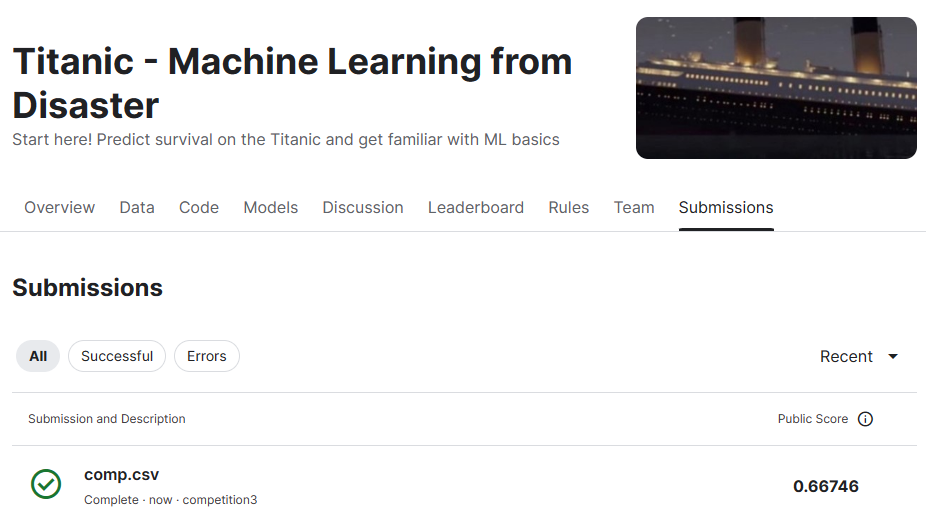

In [123]:
from IPython.display import display, Image

# Exibir a imagem
display(Image(filename='kaggle.png'))
